# Chapter 2 Exercises

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import arviz as     az
import pymc3 as pm

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


## Question 1
***

In [2]:
np.random.seed(123)
trials = 4
theta_real = 0.35  # unknown value in a real experiment
data = stats.bernoulli.rvs(p=theta_real, size=trials)

### Baseline model
First let us set a baseline model with a $\alpha =1, \beta=1$ prior. We'll give $\theta$ a more verbose name to be able to more easily identify it later. It should be noted that string variable names do not have to the same as the object name.

When evaluating each model the strategy will be the same.
1. Run the model
2. Read the warning messages
3. View the posterior kernel density estimate and traceplot
4. Inspect the numerical summary

In [3]:
with pm.Model() as our_first_model:
    # a priori
    θ = pm.Beta('θ Beta(alpha=1, beta=1)', alpha=1., beta=1.)
    # likelihood
    y = pm.Bernoulli('y', p=θ, observed=data)
    trace_baseline = pm.sample(10000, random_seed=123)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [θ Beta(alpha=1, beta=1)]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:16<00:00, 1296.48draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117aeccf8>,
      dtype=object)

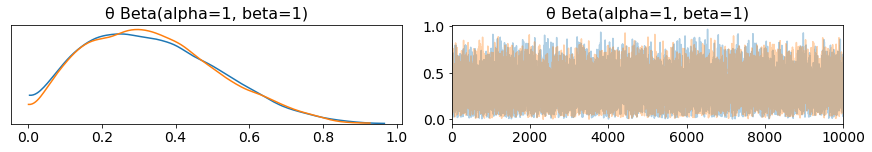

In [4]:
az.plot_trace(trace_baseline)

In [5]:
baseline_model = az.summary(trace_baseline)
baseline_model

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
"θ Beta(alpha=1, beta=1)",0.33,0.18,0.0,0.03,0.65,8211.0,1.0


## Match prior for previous example

* Question for Osvaldo*
When it says match those of previous chapter, what specifically is it referring to? There are multiple priors and models in the previous chapter

In [6]:
"""
with pm.Model() as our_first_model:
    # a priori
    # likelihood
    y = pm.Bernoulli('y', p=θ, observed=data)
    trace = pm.sample(1000, random_seed=123)
"""

"\nwith pm.Model() as our_first_model:\n    # a priori\n    # likelihood\n    y = pm.Bernoulli('y', p=θ, observed=data)\n    trace = pm.sample(1000, random_seed=123)\n"

### Replace the beta distribution with a uniform one in the interval [0,1]

In [7]:
with pm.Model() as our_first_model:
    # a priori
    θ = pm.Uniform('θ Uniform(0,1)', lower=0, upper=1)
    # likelihood
    y = pm.Bernoulli('y', p=θ, observed=data)
    trace_uniform_1_1 = pm.sample(10000, random_seed=123)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [θ Uniform(0,1)]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:20<00:00, 1023.39draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c25a61ac8>,
      dtype=object)

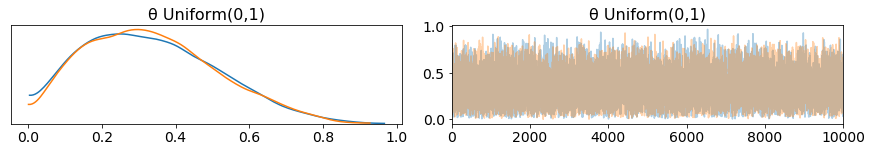

In [8]:
az.plot_trace(trace_uniform_1_1)

In [9]:
uniform_prior_0_1 = az.summary(trace_uniform_1_1)
pd.concat([baseline_model, uniform_prior_0_1])

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
"θ Beta(alpha=1, beta=1)",0.33,0.18,0.0,0.03,0.65,8211.0,1.0
"θ Uniform(0,1)",0.33,0.18,0.0,0.03,0.65,8211.0,1.0


### Discussion
Both priors are produce identical results. This is to be expected as a $Beta(1,1)$ prior is exactly the same as a $Uniform(0,1)$ prior. I encourage you prove it to yourself by plotting both. Furthermore the model sampling time is identical as well.

## Replace the beta distribution with a uniform  [-1,2]

In [10]:
with pm.Model() as our_first_model:
    # a priori
    θ = pm.Uniform('θ Uniform(-1,2)', lower=-1, upper=2)
    # likelihood
    y = pm.Bernoulli('y', p=θ, observed=data)
    trace_uniform_prior_minus_1_2 = pm.sample(10000, random_seed=123)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [θ Uniform(-1,2)]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:18<00:00, 1122.65draws/s]
There were 1179 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1074 divergences after tuning. Increase `target_accept` or reparameterize.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2579acf8>,
      dtype=object)

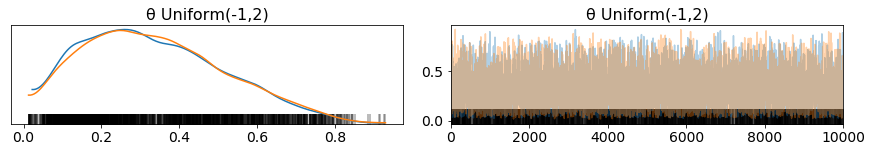

In [11]:
az.plot_trace(trace_uniform_prior_minus_1_2)

In [12]:
uniform_prior_minus_1_2 = az.summary(trace_uniform_prior_minus_1_2)
pd.concat([baseline_model, uniform_prior_minus_1_2])

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
"θ Beta(alpha=1, beta=1)",0.33,0.18,0.0,0.03,0.65,8211.0,1.0
"θ Uniform(-1,2)",0.34,0.18,0.0,0.03,0.66,5170.0,1.0


### Discussion
Looking at the mean, sd, and HPD values both results look identical which is great. However there three items that raise concerns. We will cover these all in depth in Chapter 8 but will note them here as part of the exercise.

The first is that there's two new warning messages that look something like _There were 1179 divergences after tuning. Increase `target_accept` or reparameterize._ Here the sampler is warning us that something is going wrong with sampling.

The second is the black bars at the bottom of the traceplot. These also indicate divergences.

Lastly when looking at eff_n, which stands for effective number of samples, the $Uniform(-1,2)$ prior has a much lower number than the $Beta(1,1)$, meaning that the number of useful samples was much less than the total number of samples drawn

This makes sense when asking the question _Can a probabiity be less than 0 or more than 1?_ The answer is no, but in our prior we're asking the sampler to "test" prior probability values less 0 and greater than 1, and when it does so the likelihood function is unable to compute a value.

Again we'll cover MCMC diagnostics, and what to do, in much more detail in Chapter 8, but for now it is sufficient to be able to recognize these warnings when they appear.

## Question 3
***

First let's load the data and calculate the mean and standard deviation

In [13]:
data = np.loadtxt('../code/data/chemical_shifts.csv')

In [14]:
empirical_mean = np.mean(data)
empirical_std = np.std(data)
empirical_mean, empirical_std

(53.49645833333333, 3.4200063898474258)

Next let's create a model with a prior parametrized by $\mu \text{~} N(53, \sigma)$. Since we want to test the effect of various $\sigma$ values. We'll assume that values of [1.5, 3, 5] are reasonable priors parameters. We'll also add one unreasonable $sigma$ of 100 for comparison.

A benefit of Python is that we can create a loop to run three models and compare results.

In [15]:
summaries = []
sd_priors = [1.5, 3, 5, 1000]

for sd_prior in sd_priors:
    with pm.Model() as model_g:
        # Modified prior to Gaussian
        μ = pm.Normal('μ_prior_{}'.format(sd_prior), mu=empirical_mean, sd=sd_prior)
        σ = pm.HalfNormal('σ', sd=10)
        y = pm.Normal('y', mu=μ, sd=σ, observed=data)
        trace_g = pm.sample(1000)
        summaries.append(az.summary(trace_g))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ_prior_1.5]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:01<00:00, 1530.95draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ_prior_3]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:02<00:00, 1180.20draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ_prior_5]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:02<00:00, 1478.17draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ_prior_1000]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:02<00:00, 1488.61draws/s]


In [16]:
pd.concat(summaries)

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
μ_prior_1.5,53.50,0.50,0.01,52.57,54.47,2010.0,1.00
σ,3.54,0.37,0.01,2.89,4.20,1868.0,1.00
μ_prior_3,53.49,0.52,0.01,52.45,54.40,1655.0,1.00
σ,3.56,0.37,0.01,2.88,4.24,1507.0,1.00
μ_prior_5,53.48,0.51,0.01,52.61,54.46,1693.0,1.00
σ,3.54,0.37,0.01,2.87,4.22,2020.0,1.01
μ_prior_1000,53.48,0.50,0.01,52.55,54.39,2085.0,1.00
σ,3.53,0.38,0.01,2.81,4.23,1785.0,1.00


Looking at the summaries the combination of model and inference technique seem quite robust to the changes. Even with a prior that is 300x larger than the empirical prior the posterior values converge to approximately the same result. Computationally there seems to be very little difference.

Logically however there could be some question of the choice of an unbounded prior. Since it is not possible to values that below 0 or above 100, it doesn't make practical sense to have a prior that exists for those values. Luckily though with modern inference methods such as NUTS, the samples can "bypass" questionable priors and still get a good approximation of the posterior.

### Question 4
***

Let's first compute the mean and standard deviation without removing any data

In [17]:
data = np.loadtxt('../code/data/chemical_shifts.csv')
empirical_mean, empirical_std = np.mean(data), np.std(data)
empirical_mean, empirical_std

(53.49645833333333, 3.4200063898474258)

Then let's let's identify outliers by using the _2x standard deviation_ methodology

In [18]:
empirical_mean,empirical_std = np.mean(data), np.std(data)

In [19]:
outlier_mask = ~(np.abs(data-empirical_mean) < empirical_std*2)
data[outlier_mask]

array([63.43, 68.58])

Removing those two values let recompute the mean and standard deviation

In [20]:
empirical_mean_no_outliers = np.mean(data[~outlier_mask])
empirical_std_no_outliers = np.std(data[~outlier_mask])

empirical_mean_no_outliers, empirical_std_no_outliers

(52.95260869565218, 2.1950303897892387)

Notice that the mean has dropped from 53.49 to 52.9, and the standard deviatipn has dropped from 3.42 to 2.19. Logically this makes sense as the data is "less spread out" when we don't include  outliers.

Let's repeat the exercise but add more outliers. We can do this by repeating the previously identified outliers a couple more times

In [21]:
# Create an array with the outliers repeated 4 times
additional_outliers = np.repeat(data[outlier_mask],4)

# Concatenate the original data array and the additional outliers
data_more_outliers = np.concatenate([data, additional_outliers])
data_more_outliers

array([51.06, 55.12, 53.73, 50.24, 52.05, 56.4 , 48.45, 52.34, 55.65,
       51.49, 51.86, 63.43, 53.  , 56.09, 51.93, 52.31, 52.33, 57.48,
       57.44, 55.14, 53.93, 54.62, 56.09, 68.58, 51.36, 55.47, 50.73,
       51.94, 54.95, 50.39, 52.91, 51.5 , 52.68, 47.72, 49.73, 51.82,
       54.99, 52.84, 53.19, 54.52, 51.46, 53.73, 51.61, 49.81, 52.42,
       54.3 , 53.84, 53.16, 63.43, 63.43, 63.43, 63.43, 68.58, 68.58,
       68.58, 68.58])

In [22]:
empirical_mean_more_outliers = np.mean(data_more_outliers)
empirical_std_more_outliers = np.std(data_more_outliers)

empirical_mean_more_outliers, empirical_std_more_outliers

(55.28339285714286, 5.489222647537144)

The mean and the standard deviation both go up in this case. This intuitively makes sense because the the distribution needs to "stretch" to include these additional data points that are farther away from mean.

# Question 5
***
TODO: PPC Check values look off

In [24]:
tips = pd.read_csv('../code/data/tips.csv')

In [25]:
tip = tips['tip'].values
idx = pd.Categorical(tips['day'],
                     categories=['Thur', 'Fri', 'Sat', 'Sun']).codes
groups = len(np.unique(idx))

### Gaussian Model

In [27]:
with pm.Model() as comparing_groups:
    μ = pm.Normal('μ', mu=0, sd=10, shape=groups)
    σ = pm.HalfNormal('σ', sd=10, shape=groups)
    ν = pm.Exponential('ν', 1/30)
    y = pm.Normal('y', mu=μ[idx], sd=σ[idx], observed=tip)
    trace_normal = pm.sample(5000)
    y_pred_normal = pm.sample_posterior_predictive(trace_normal, 100)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ν, σ, μ]
100%|██████████| 100/100 [00:00<00:00, 494.54it/s]


Text(0.5, 1.0, 'Posterior Predictive Check for Normal Tips Model')

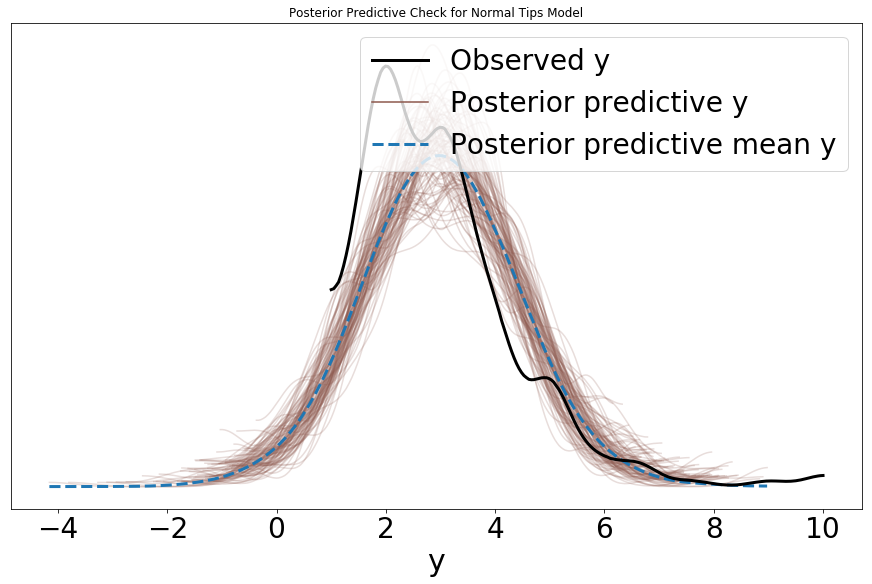

In [28]:
tips_normal = az.from_pymc3(trace=trace_normal, posterior_predictive=y_pred_normal)
axes = az.plot_ppc(tips_normal, figsize=(12,8))
axes[0].set_title("Posterior Predictive Check for Normal Tips Model")

### Shared $\nu$ across all groups

In [29]:
with pm.Model() as comparing_groups:
    μ = pm.Normal('μ', mu=0, sd=10, shape=groups)
    σ = pm.HalfNormal('σ', sd=10, shape=groups)
    ν = pm.Exponential('ν', 1/30)
    y = pm.StudentT('y', mu=μ[idx], sd=σ[idx], nu=ν, observed=tip)
    
    trace_nu_shared = pm.sample(5000)
    y_pred_nu_shared = pm.sample_posterior_predictive(trace_nu_shared, 100)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ν, σ, μ]
100%|██████████| 100/100 [00:00<00:00, 784.38it/s]


(-4.5, 10)

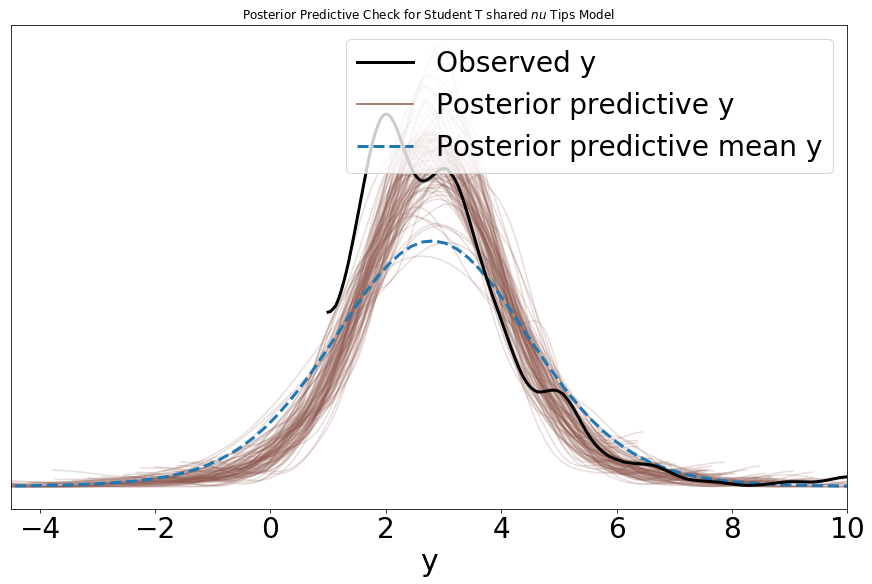

In [30]:
tips_nu_shared = az.from_pymc3(trace=trace_nu_shared, posterior_predictive=y_pred_nu_shared)
axes = az.plot_ppc(tips_nu_shared, figsize=(12,8))
axes[0].set_title("Posterior Predictive Check for Student T Shared ν Tips Model")
axes[0].set_xlim(-4.5,10)

### $\nu$ per group

In [31]:
with pm.Model() as comparing_groups:
    μ = pm.Normal('μ', mu=0, sd=10, shape=groups)
    σ = pm.HalfNormal('σ', sd=10, shape=groups)
    ν = pm.Exponential('ν', 1/30, shape=groups)
    y = pm.StudentT('y', mu=μ[idx], sd=σ[idx], nu=ν[idx], observed=tip)
    
    trace_nu_per_group = pm.sample(5000)
    y_pred_nu_per_group = pm.sample_posterior_predictive(trace_nu_per_group, 100)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ν, σ, μ]
Sampling 2 chains: 100%|██████████| 11000/11000 [00:20<00:00, 525.39draws/s]
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
100%|██████████| 100/100 [00:00<00:00, 572.46it/s]


(-10, 10)

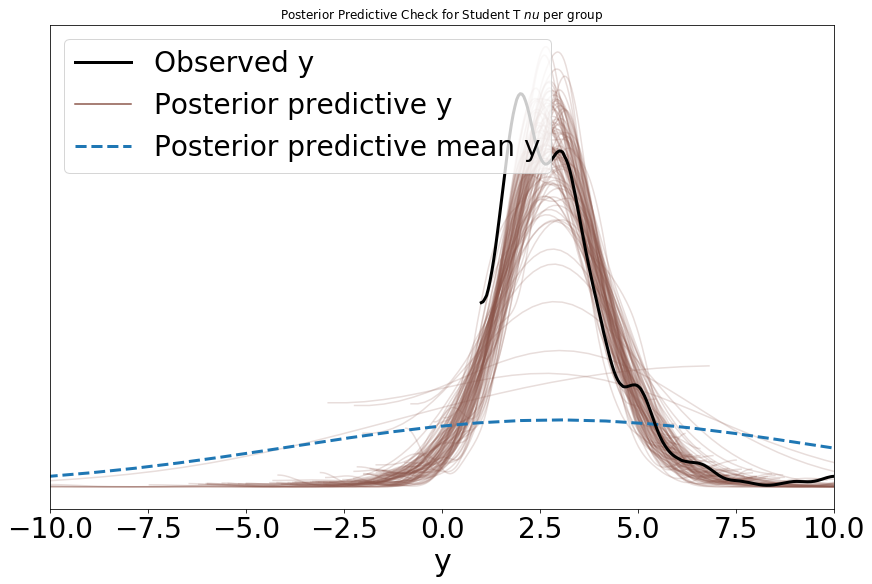

In [32]:
tips_nu_per_group = az.from_pymc3(trace=trace_nu_per_group, posterior_predictive=y_pred_nu_per_group)
axes = az.plot_ppc(tips_nu_per_group, figsize=(12,8))
axes[0].set_title("Posterior Predictive Check for Student T ν per group")
axes[0].set_xlim(-10,10)

# Question 6
***

In [33]:
tips = pd.read_csv('../code/data/tips.csv')
tip = tips['tip'].values
idx = pd.Categorical(tips['day'],
                     categories=['Thur', 'Fri', 'Sat', 'Sun']).codes
groups = len(np.unique(idx))

In [34]:
with pm.Model() as comparing_groups:
    μ = pm.Normal('μ', mu=0, sd=10, shape=groups)
    σ = pm.HalfNormal('σ', sd=10, shape=groups)
    y = pm.Normal('y', mu=μ[idx], sd=σ[idx], observed=tip)
    
    trace_cg = pm.sample(5000)
    ppc_cg = pm.sample_posterior_predictive(trace_cg, samples=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ]
100%|██████████| 500/500 [00:00<00:00, 1094.20it/s]


In [35]:
tips_gaussian = az.summary(trace_cg)
tips_gaussian

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
μ[0],2.77,0.16,0.0,2.47,3.08,10602.0,1.0
μ[1],2.73,0.26,0.0,2.25,3.23,8718.0,1.0
μ[2],2.99,0.18,0.0,2.66,3.31,11082.0,1.0
μ[3],3.25,0.14,0.0,2.99,3.53,11346.0,1.0
σ[0],1.27,0.12,0.0,1.05,1.48,9196.0,1.0
σ[1],1.10,0.20,0.0,0.75,1.45,9063.0,1.0
σ[2],1.66,0.13,0.0,1.43,1.90,11465.0,1.0
σ[3],1.25,0.10,0.0,1.06,1.45,10716.0,1.0


# Question 7
***

In [36]:
# Generate data
N_samples = [30, 30, 30]
G_samples = [18, 18, 18]  # [3, 3, 3]  [18, 3, 3]

group_idx = np.repeat(np.arange(len(N_samples)), N_samples)
data = []
for i in range(0, len(N_samples)):
    data.extend(np.repeat([1, 0], [G_samples[i], N_samples[i]-G_samples[i]]))

In [37]:
# Baseline model
with pm.Model() as model_h:
    μ = pm.Beta('μ', 1., 1.)
    κ = pm.HalfNormal('κ', 10)
    θ = pm.Beta('θ', alpha=μ*κ, beta=(1.0-μ)*κ, shape=len(N_samples))
    y = pm.Bernoulli('y', p=θ[group_idx], observed=data)
    
    trace_h = pm.sample(2000)
    ppc_h = pm.sample_posterior_predictive(trace_h, samples=500)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [θ, κ, μ]
100%|██████████| 500/500 [00:00<00:00, 1518.45it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c26b15cf8>,
      dtype=object)

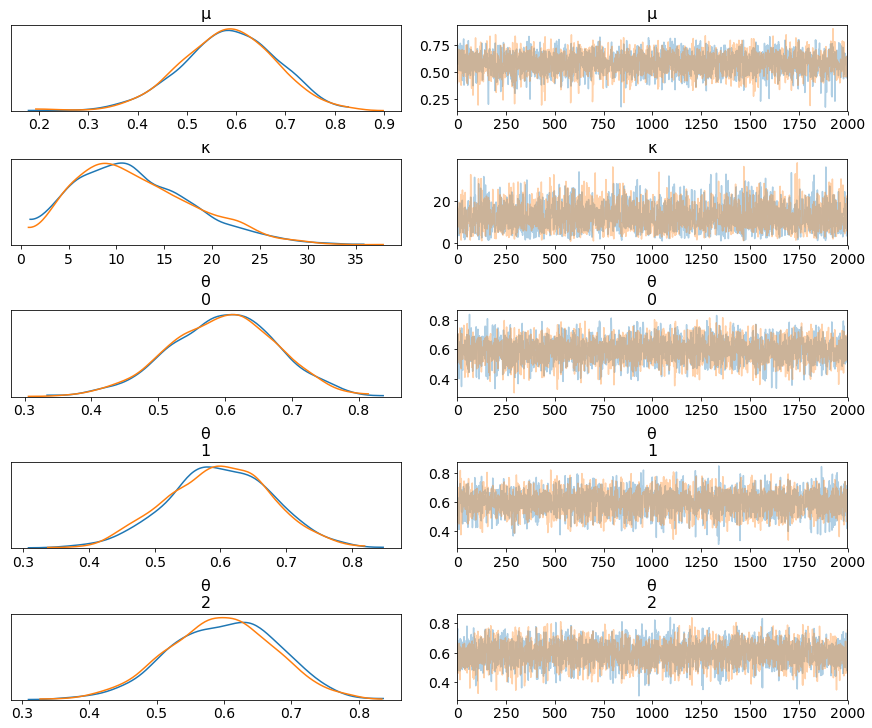

In [38]:
az.plot_trace(trace_h)

In [39]:
baseline_summary = az.summary(trace_h)
baseline_summary

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
μ,0.58,0.10,0.00,0.40,0.76,3410.0,1.0
κ,12.05,6.21,0.09,1.79,23.33,3042.0,1.0
θ[0],0.60,0.08,0.00,0.45,0.75,3476.0,1.0
θ[1],0.60,0.08,0.00,0.45,0.74,4182.0,1.0
θ[2],0.60,0.08,0.00,0.45,0.74,3631.0,1.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c2b91be80>],
      dtype=object)

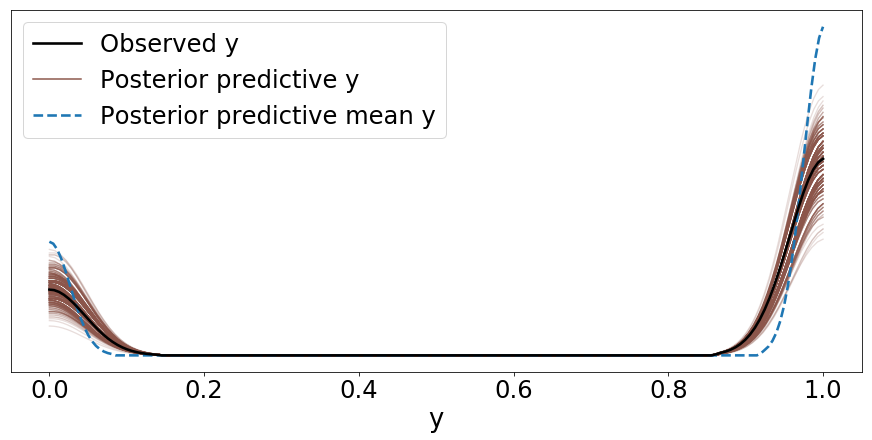

In [40]:
baseline_model = az.from_pymc3(trace=trace_h, posterior_predictive=ppc_h)
az.plot_ppc(baseline_model, figsize=(12,6))

In [41]:
# Flat model
with pm.Model() as model_h:
    μ = pm.Beta('μ', 1., 1.)
    κ = pm.HalfNormal('κ', 10)
    θ = pm.Beta('θ', alpha=μ*κ, beta=(1.0-μ)*κ)
    y = pm.Bernoulli('y', p=θ, observed=data)
    
    trace_non_h = pm.sample(2000)
    ppc_non_h = pm.sample_posterior_predictive(trace_non_h, samples=500)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [θ, κ, μ]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:04<00:00, 1056.78draws/s]
The acceptance probability does not match the target. It is 0.8856674325731343, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
100%|██████████| 500/500 [00:00<00:00, 2464.23it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c280b5908>,
      dtype=object)

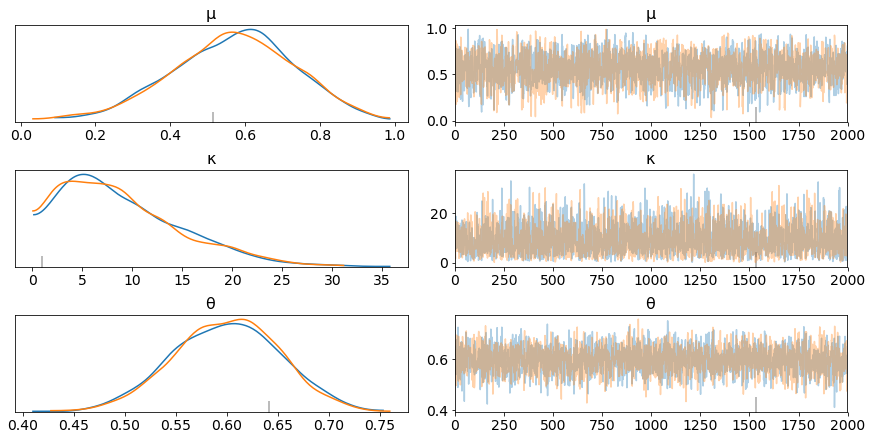

In [42]:
az.plot_trace(trace_non_h)

In [43]:
flat_summary = az.summary(trace_non_h)
flat_summary

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
μ,0.56,0.17,0.0,0.27,0.88,2311.0,1.0
κ,9.04,6.00,0.1,0.33,20.05,2956.0,1.0
θ,0.60,0.05,0.0,0.51,0.70,2662.0,1.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c283eccc0>],
      dtype=object)

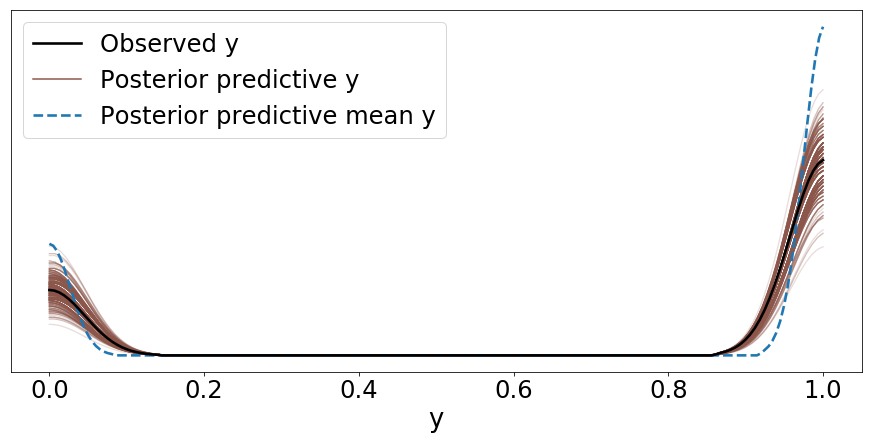

In [44]:
flat_model = az.from_pymc3(trace=trace_non_h, posterior_predictive=ppc_non_h)
az.plot_ppc(flat_model, figsize=(12,6))

### Summary comparison

In [45]:
pd.concat([baseline_summary, flat_summary])

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
μ,0.58,0.10,0.00,0.40,0.76,3410.0,1.0
κ,12.05,6.21,0.09,1.79,23.33,3042.0,1.0
θ[0],0.60,0.08,0.00,0.45,0.75,3476.0,1.0
θ[1],0.60,0.08,0.00,0.45,0.74,4182.0,1.0
θ[2],0.60,0.08,0.00,0.45,0.74,3631.0,1.0
μ,0.56,0.17,0.00,0.27,0.88,2311.0,1.0
κ,9.04,6.00,0.10,0.33,20.05,2956.0,1.0
θ,0.60,0.05,0.00,0.51,0.70,2662.0,1.0


# Question 8
***
Refer to Question 6 for non pooled version of model

In [46]:
with pm.Model() as pooled_mu_tips:
    
    # Pooled Expected mean of tips
    pooled_mean = pm.Normal('pooled_mean', mu=0, sd=10)
    μ = pm.Normal("μ", mu=pooled_mean, sd=1, shape=groups)
    
    # Unpooled Standard Deviation of tips
    σ = pm.HalfNormal('σ', sd=10, shape=groups)

    y = pm.Normal('y', mu=μ[idx], sd=σ[idx], observed=tip)
    
    trace_pooled_tips = pm.sample(5000)
    ppc_pooled_tips = pm.sample_posterior_predictive(trace_cg, samples=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ, pooled_mean]
100%|██████████| 500/500 [00:00<00:00, 1421.86it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2f0ef198>,
      dtype=object)

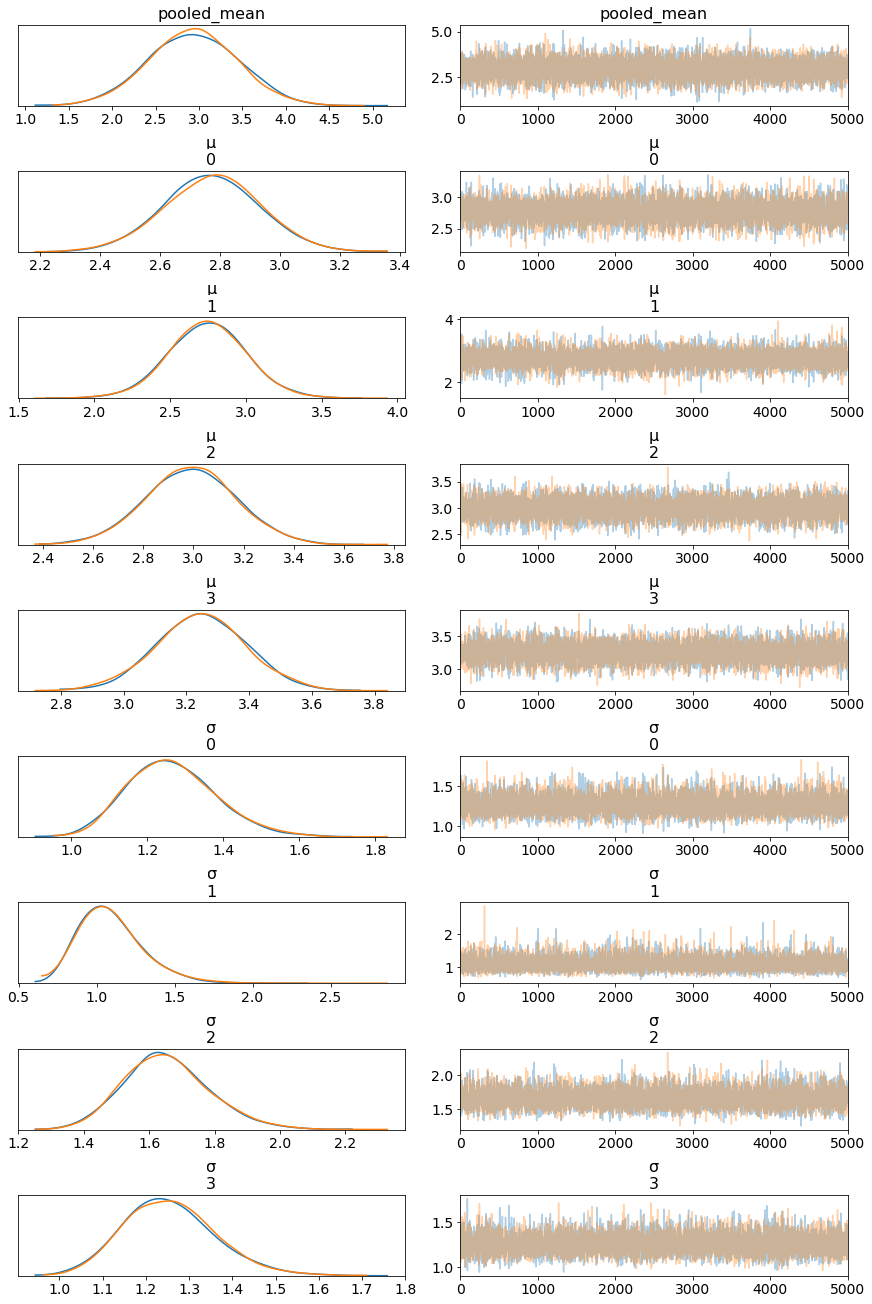

In [47]:
az.plot_trace(trace_pooled_tips)

In [48]:
tips_pooled_summary = az.summary(trace_pooled_tips)
tips_pooled_summary

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
pooled_mean,2.93,0.51,0.0,1.98,3.89,14019.0,1.0
μ[0],2.78,0.16,0.0,2.48,3.09,12304.0,1.0
μ[1],2.75,0.25,0.0,2.27,3.23,11351.0,1.0
μ[2],2.99,0.18,0.0,2.65,3.32,12340.0,1.0
μ[3],3.25,0.14,0.0,2.99,3.52,11474.0,1.0
σ[0],1.27,0.12,0.0,1.06,1.48,12238.0,1.0
σ[1],1.10,0.20,0.0,0.77,1.49,10616.0,1.0
σ[2],1.66,0.13,0.0,1.42,1.90,12545.0,1.0
σ[3],1.26,0.11,0.0,1.07,1.46,11908.0,1.0


In [49]:
pd.concat([tips_gaussian, tips_pooled_summary])

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
μ[0],2.77,0.16,0.0,2.47,3.08,10602.0,1.0
μ[1],2.73,0.26,0.0,2.25,3.23,8718.0,1.0
μ[2],2.99,0.18,0.0,2.66,3.31,11082.0,1.0
μ[3],3.25,0.14,0.0,2.99,3.53,11346.0,1.0
σ[0],1.27,0.12,0.0,1.05,1.48,9196.0,1.0
σ[1],1.10,0.20,0.0,0.75,1.45,9063.0,1.0
σ[2],1.66,0.13,0.0,1.43,1.90,11465.0,1.0
σ[3],1.25,0.10,0.0,1.06,1.45,10716.0,1.0
pooled_mean,2.93,0.51,0.0,1.98,3.89,14019.0,1.0
μ[0],2.78,0.16,0.0,2.48,3.09,12304.0,1.0


# Question 9
***

To generate graphs you may need to install grapviz using the command `conda install -c conda-forge python-graphviz`

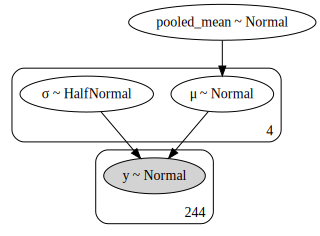

In [50]:
pm.model_to_graphviz(pooled_mu_tips)